In [1]:
import pandas as pd
import seaborn as sns

# thresholds for knotty/pknots analysis: 
# overall shape score: 0.6
# pk_bp_shape score: 0.6
# rank: 5
# consensus: 0.5
# pk_bp consensus: 0.5

def get_graphs(df):
    
    # important graphs: shape vs. pk_bp_shape
    # consensus vs. pk_bp_consensus
    # pk_bp_shape vs. pk_bp_consensus
    
    axes = [['shape_score', 'pk_bp_shape_score'], ['weighted_consensus_score', 'weighted_pk_bp_consensus_score'], ['pk_bp_shape_score', 'weighted_pk_bp_consensus_score']]
    
    for graph in axes: 
        x_axis = graph[0]
        y_axis = graph[1]
        g = sns.jointplot(x=x_axis, y=y_axis, data=df, kind='reg', xlim=(0,1.0), ylim=(0,1.0), truncate=False)
        
def impose_threshold(df, shape, pk_bp_shape, rank, consensus, pk_bp_consensus):
    sub_df = df.loc[(df['shape_score'] >= shape) & (df['pk_bp_shape_score'] >= pk_bp_shape) & (df['rank'] >= rank) & (df['weighted_consensus_score'] > consensus) & (df['weighted_pk_bp_consensus_score'] > pk_bp_consensus)]
    return sub_df
    

threshknot_vs_knotty = pd.read_csv('/home/gnye8/Desktop/PK_research/pipeline_results/threshknot/threshknot_vs_knotty_analysis_scores.csv')
threshknot_vs_pknots = pd.read_csv('/home/gnye8/Desktop/PK_research/pipeline_results/threshknot/threshknot_vs_pknots_analysis_scores.csv')
knotty_vs_threshknot = pd.read_csv('/home/gnye8/Desktop/PK_research/pipeline_results/knotty/knotty_vs_threshknot_analysis_scores.csv')
pknots_vs_threshknot = pd.read_csv('/home/gnye8/Desktop/PK_research/pipeline_results/pknots/pknots_vs_threshknot_analysis_scores.csv')

In [2]:
df = pd.read_csv('/home/gnye8/Desktop/PK_research/pipeline_results/analysis_output/first_weighted_consensus.csv')
df.sort_values('weighted_pk_bp_consensus_score', ascending=False)

,Unnamed: 0,program,start,end,sequence,structure,shape_score,pk_bp_shape_score,rank,weighted_consensus_score,weighted_pk_bp_consensus_score
7,1542,spotrna,15040,15160,AUGUCAUCCCUACUAUAACUCAAAUGAAUCUUAAGUAUGCCAUUAG...,.(((.....................[..............(..(((...,0.583333,1.000000,2.0,0.293269,0.375000
767,1041,pknots,12280,12400,GAUCAAGCUAUGACCCAAAUGUAUAAACAGGCUAGAUCUGAGGACA...,.....((((.[[.[[[...(((....)))))))...(((..........,0.666667,0.777778,5.5,0.149194,0.347222
1389,1231,pknots,29600,29720,GUCUACUCUUGUGCAGAAUGAAUUCUCGUAACUACAUAGCACAAGU...,.......(((((((...((((....))))[[[[[[[[.)))))))....,0.625000,0.600000,12.0,0.165441,0.333333
422,1347,pyle,15040,15160,ATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAG...,.((((..................[[[..............(((.((...,0.616667,0.857143,5.0,0.299107,0.321429
1373,764,threshknot,29600,29720,GTCTACTCTTGTGCAGAATGAATTCTCGTAACTACATAGCACAAGT...,.((((..(((((((...............[[[[[[[..))))))))...,0.675000,0.611111,13.5,0.300000,0.319444
...,...,...,...,...,...,...,...,...,...,...,...
823,411,knotty,15240,15360,AUGUUAAAAACUGUUUAUAGUGAUGUAGAAAACCCUCACCUUAUGG...,.............(((((([[[[)))))).(((((]]]].....))...,0.708333,0.766667,5.0,0.000000,0.000000
824,705,knotty,28040,28160,GGAGCUAGAAAAUCAGCACCUUUAAUUGAAUUGUGCGUGGAUGAGG...,.....((((..(((((([[[....[[[[[..[[[[[[[[[.[[[.)...,0.650000,0.766667,22.5,0.013889,0.000000
828,957,pknots,4640,4760,UGGAAGAAGCUGCUCGGUAUAUGAGAUCUCUCAAAGUGCCAGCUAC...,..((((((((((((((.....))))......(.[[[[).)))))((...,0.741667,0.766667,7.0,0.040441,0.000000
833,956,pknots,4600,4720,GUUACAAUGCCACUUGGCUAUGUAACACAUGGCUUAAAUUUGGAAG...,((((((..(((....)))..))))))...((((.....(((((.[[...,0.708333,0.764706,13.0,0.064286,0.000000


In [3]:
df1 = impose_threshold(df, 0.5, 0.5, 0, 0.2, 0.2)
df1 = df1.sort_values('weighted_pk_bp_consensus_score', ascending=False)
df1.to_csv('/home/gnye8/Desktop/PK_research/pipeline_results/analysis_output/top_pks.csv')
df1

,Unnamed: 0,program,start,end,sequence,structure,shape_score,pk_bp_shape_score,rank,weighted_consensus_score,weighted_pk_bp_consensus_score
7,1542,spotrna,15040,15160,AUGUCAUCCCUACUAUAACUCAAAUGAAUCUUAAGUAUGCCAUUAG...,.(((.....................[..............(..(((...,0.583333,1.000000,2.0,0.293269,0.375000
422,1347,pyle,15040,15160,ATGTCATCCCTACTATAACTCAAATGAATCTTAAGTATGCCATTAG...,.((((..................[[[..............(((.((...,0.616667,0.857143,5.0,0.299107,0.321429
1373,764,threshknot,29600,29720,GTCTACTCTTGTGCAGAATGAATTCTCGTAACTACATAGCACAAGT...,.((((..(((((((...............[[[[[[[..))))))))...,0.675000,0.611111,13.5,0.300000,0.319444
1386,1706,spotrna,29600,29720,GUCUACUCUUGUGCAGAAUGAAUUCUCGUAACUACAUAGCACAAGU...,..((((..((((((.(((....)))...[[[[[[[[[.))))))))...,0.633333,0.605263,14.5,0.267045,0.309211
281,1541,spotrna,15000,15120,UAUGAGGAUCAAGAUGCACUUUUCGCAUAUACAAAACGUAAUGUCA...,...(((........[[[[[[....[[[[[[...................,0.558333,0.900000,12.0,0.287500,0.300000
907,1337,pyle,12280,12400,GATCAAGCTATGACCCAAATGTATAAACAGGCTAGATCTGAGGACA...,((((.((((..[.[[[...(((....))))))).))))...........,0.708333,0.750000,6.5,0.220833,0.285714
1007,341,knotty,12280,12400,GAUCAAGCUAUGACCCAAAUGUAUAAACAGGCUAGAUCUGAGGACA...,((((.((((.[[.[[[...[[[.....[[)))).))))]]...]]]...,0.716667,0.722222,8.5,0.227273,0.277778
803,854,incarnato_invivo,4320,4440,CTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATT...,...((.(................((((....))))..(((((...)...,0.783333,0.772727,6.0,0.282258,0.272727
458,1507,spotrna,12280,12400,GAUCAAGCUAUGACCCAAAUGUAUAAACAGGCUAGAUCUGAGGACA...,((((((((...................[[.))))))))]].........,0.750000,0.850000,6.0,0.230263,0.262500
72,750,threshknot,6560,6680,ATGTAGACAATTCTAGTCTTACTATTAAGAAACCTAATGAATTATC...,.....(((.......)))............(((((((............,0.575000,1.000000,8.0,0.270833,0.260417


In [9]:
pk_list

,start,# of predictions
3,12280,3
6,23920,3
7,5280,3
0,15040,2
10,440,2
21,28920,2
14,18680,2
1,29600,2
11,29560,2
8,26560,2


In [58]:
def get_structs_for_pk(df1, window):
    df = df1.loc[df1['start'] == window]
    seqs = df['sequence'].to_list()
    structs = df['structure'].to_list()
    programs = df['program'].to_list()
    
    print(seqs[0])
    for i in range(len(seqs)):
        print(programs[i])
        print(structs[i])
        
get_structs_for_pk(df1, 4320)

CTTTTACATTCTACCATCTATTATCTCTAATGAGAAGCAAGAAATTCTTGGAACTGTTTCTTGGAATTTGCGAGAAATGCTTGCACATGCAGAAGAAACACGCAAATTAATGCCTGTCTG
incarnato_invivo
...((.(................((((....))))..(((((...)))))....[[[[[[[[...((.((((((.....)))))).))).))]]]]]]]].(((......))).......
spotrna
.......................((((....))))...................((((((((...[[[((((((.....)))))).......))))))))....]]].............


In [7]:
starts = df1['start'].to_list()
all_windows = []
for start1 in starts:
    windows = []
    windows.append(start1)
    count = 0
    for start2 in starts:
        if start1 == start2:
            count += 1
    windows.append(count)
    all_windows.append(windows)

    
final = []
for i in all_windows: 
    if i not in final: 
        final.append(i)
print(final)
print(len(final))

[[15040, 2], [29600, 2], [15000, 2], [12280, 3], [4320, 2], [6560, 2], [23920, 3], [5280, 3], [26560, 2], [22120, 1], [440, 2], [29560, 2], [6520, 1], [9880, 1], [18680, 2], [8920, 1], [13480, 1], [6680, 1], [25160, 1], [8000, 1], [14120, 1], [28920, 2], [5240, 1]]
23


In [8]:
pk_list = pd.DataFrame(final, columns = ['start', '# of predictions'])
pk_list = pk_list.sort_values('# of predictions', ascending=False)
pk_list.to_csv('/home/gnye8/Desktop/PK_research/pipeline_results/analysis_output/windows_predicted.csv')

In [21]:
spotrna_hits = df1.loc[df1['program'] == 'spotrna']
spotrna_hits

,Unnamed: 0,program,start,end,sequence,structure,shape_score,pk_bp_shape_score,rank,weighted_consensus_score,weighted_pk_bp_consensus_score
7,1542,spotrna,15040,15160,AUGUCAUCCCUACUAUAACUCAAAUGAAUCUUAAGUAUGCCAUUAG...,.(((.....................[..............(..(((...,0.583333,1.000000,2.0,0.293269,0.375000
1386,1706,spotrna,29600,29720,GUCUACUCUUGUGCAGAAUGAAUUCUCGUAACUACAUAGCACAAGU...,..((((..((((((.(((....)))...[[[[[[[[[.))))))))...,0.633333,0.605263,14.5,0.267045,0.309211
281,1541,spotrna,15000,15120,UAUGAGGAUCAAGAUGCACUUUUCGCAUAUACAAAACGUAAUGUCA...,...(((........[[[[[[....[[[[[[...................,0.558333,0.900000,12.0,0.287500,0.300000
458,1507,spotrna,12280,12400,GAUCAAGCUAUGACCCAAAUGUAUAAACAGGCUAGAUCUGAGGACA...,((((((((...................[[.))))))))]].........,0.750000,0.850000,6.0,0.230263,0.262500
693,1620,spotrna,22120,22240,AAAAAUCUUAGGGAAUUUGUGUUUAAGAAUAUUGAUGGUUAUUUUA...,...................(((((.(((((((..[[[[[..........,0.633333,0.794118,13.5,0.250000,0.250000
798,1423,spotrna,4320,4440,CUUUUACAUUCUACCAUCUAUUAUCUCUAAUGAGAAGCAAGAAAUU...,.......................((((....))))..............,0.766667,0.772727,8.0,0.321429,0.238636
990,1485,spotrna,9880,10000,AGAUACUUAGCUCUUUAUAAUAAGUACAAGUAUUUUAGUGGAGCAA...,.(((((((.[[[[........)......))))))......]]]].....,0.633333,0.727273,8.5,0.215909,0.227273
1393,1523,spotrna,13480,13600,UAAGUGCAGCCCGUCUUACACCGUGCGGCACAGGCACUAGUACUGA...,..(((((.................[[.....[[)))))....]]((...,0.666667,0.600000,4.0,0.218750,0.208333
858,1655,spotrna,25160,25280,UCCAAGAACUUGGAAAGUAUGAGCAGUAUAUAAAAUGGCCAUGGUA...,((((((..)))))).................(((..(((((........,0.775000,0.750000,1.0,0.201389,0.208333
830,1671,spotrna,26560,26680,UAAAAAGCUCCUUGAACAAUGGAACCUAGUAAUAGGUUUCCUAUUC...,......................(((((((..)))))))...........,0.758333,0.766667,10.0,0.244318,0.208333


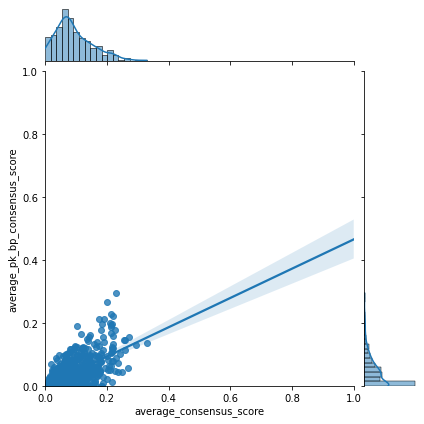

In [3]:
df = pd.read_csv('/home/gnye8/Desktop/PK_research/pipeline_results/analysis_output/avg_consensus_scores.csv')
df
g = sns.jointplot(x='average_consensus_score', y='average_pk_bp_consensus_score', data=df, kind='reg', xlim=(0,1.0), ylim=(0,1.0), truncate=False)

In [17]:
df2 = df.loc[(df['average_consensus_score'] >= 0.2) & (df['average_pk_bp_consensus_score'] >= 0.13)]
df2
df3 = df2.sort_values('average_pk_bp_consensus_score', ascending=False)
#df3.to_csv('/home/gnye8/Desktop/PK_research/pipeline_results/analysis_output/top_avg_consensus_scores.csv')
df3

,Unnamed: 0,location,average_consensus_score,average_pk_bp_consensus_score
535,535,29600,0.228261,0.294584
257,257,12280,0.200513,0.266996
161,161,15000,0.214881,0.229848
7,7,15040,0.219879,0.223506
345,345,22120,0.208796,0.200236
54,54,6560,0.218132,0.196028
400,400,440,0.214013,0.192489
181,181,23920,0.213698,0.186291
244,244,4320,0.225801,0.178234
382,382,26560,0.212810,0.166486
